In [16]:
%pip install pandas numpy matplotlib scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, math, random, time

Note: you may need to restart the kernel to use updated packages.


### Provide sensor data recording to run the processing/analysis on

In [17]:
SENSOR_DATA = 'recordings/0.csv'
ALGORITHM_DATA = SENSOR_DATA.replace('recordings/', 'analysis/').replace('.csv', '_algo.csv')
ANGLES_DATA = SENSOR_DATA.replace('recordings/', 'analysis/').replace('.csv', '_angles.csv')
STEPS_DATA = SENSOR_DATA.replace('recordings/', 'analysis/').replace('.csv', '_steps.csv')

### Cut off debug data from flashing if there's any left

In [18]:
HEADERS = "time,gyro.x,gyro.y,gyro.z,accel.x,accel.y,accel.z"
lines = []
cutting = False
with open(SENSOR_DATA, 'r') as file:
    found_start = False
    for (i, line) in enumerate(file.readlines()):
        if not found_start and HEADERS in line:
            if i == 0:
                break
            found_start = True
            cutting = True
        if found_start:
            lines.append(line)
if cutting:
    with open(SENSOR_DATA, 'w') as file:
        file.writelines(lines[:-1])

### Run the sensor processing code

In [19]:
result = os.system(f'cargo run --release -- {SENSOR_DATA}')
if result != 0:
    raise Exception('Failed to compile sensor data')

    Finished `release` profile [optimized] target(s) in 0.02s
     Running `target/release/test-processing recordings/0.csv`


### Load sensor data

In [20]:
steps = pd.read_csv(SENSOR_DATA)
# Convert ESP32 system time to local time so the graphs make more sense.
now = time.time()
steps['t'] = pd.to_datetime((steps['time'] / 1_000_000_000.0) + now, unit='s')
steps.set_index(steps['t'], inplace=True)
steps.drop(columns=['t'], inplace=True)
steps

,time,gyro.x,gyro.y,gyro.z,accel.x,accel.y,accel.z
t,,,,,,,
2024-11-29 16:54:09.385241508,457228492000,-0.029577,0.151351,0.169603,-1.237802,0.611719,9.812635
2024-11-29 16:54:09.395954370,457239205000,-0.045565,0.104986,0.256603,-1.739388,0.739808,9.980229
2024-11-29 16:54:09.406366587,457249617000,-0.059688,-0.108051,0.430604,-1.553837,1.054646,10.170568
2024-11-29 16:54:09.416778564,457260029000,-0.099257,-0.296173,0.564901,-0.526724,0.665588,9.753978
2024-11-29 16:54:09.427263498,457270514000,-0.119908,-0.350931,0.627253,0.559046,0.266954,9.385271
...,...,...,...,...,...,...,...
2024-11-29 16:54:21.259403467,469102654000,0.105919,-0.324019,0.348267,3.493140,1.424550,8.852561
2024-11-29 16:54:21.267932414,469111183000,0.087666,-0.281384,0.355728,3.551798,1.356315,8.991425
2024-11-29 16:54:21.276396513,469119647000,0.060753,-0.256470,0.361590,3.602077,1.406593,9.235633


### Load algorithm debug data

In [21]:
algo = pd.read_csv(ALGORITHM_DATA)
# Convert ESP32 system time to local time so the graphs make more sense.
algo['t'] = pd.to_datetime((algo['time'] / 1_000_000_000.0) + now, unit='s')
algo.set_index(algo['t'], inplace=True)
algo.drop(columns=['t'], inplace=True)
algo.head()

,time,orientation.w,orientation.x,orientation.y,orientation.z,velocity.x,velocity.y,velocity.z,position.x,position.y,...,world_acc.y,world_acc.z,gyro_orientation.w,gyro_orientation.x,gyro_orientation.y,gyro_orientation.z,accel_orientation.w,accel_orientation.x,accel_orientation.y,accel_orientation.z
t,,,,,,,,,,,,,,,,,,,,,
2024-11-29 16:54:09.385234118,457228484608,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2024-11-29 16:54:09.395949125,457239199744,0.999986,0.001611,0.004829,0.001147,-0.017620,0.007540,0.002060,-0.000189,0.000081,...,0.703740,0.192246,0.999999,-0.000244,0.000562,0.001375,0.995619,0.036851,0.085879,-0.003179
2024-11-29 16:54:09.406369448,457249619968,0.999958,0.003821,0.007812,0.003028,-0.032213,0.017623,0.006172,-0.000524,0.000264,...,0.967850,0.394731,0.999984,0.001311,0.004262,0.003391,0.995828,0.051493,0.075233,-0.003890
2024-11-29 16:54:09.416789770,457260040192,0.999946,0.004868,0.007288,0.005625,-0.036288,0.023513,0.005755,-0.000903,0.000509,...,0.565398,-0.039989,0.999957,0.003332,0.006256,0.005969,0.999058,0.034047,0.026893,-0.000916
2024-11-29 16:54:09.427275419,457270525952,0.999946,0.004770,0.003671,0.008485,-0.029741,0.025476,0.001314,-0.001214,0.000777,...,0.187455,-0.423556,0.999936,0.004273,0.005429,0.008909,0.999457,0.014211,-0.029729,0.000423


### Preview raw sensor data

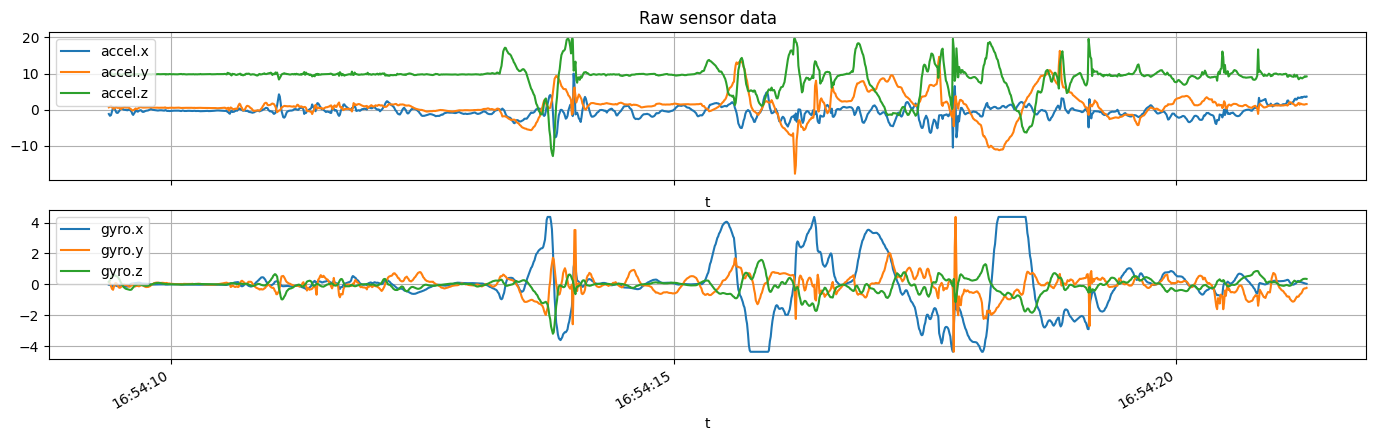

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1)

steps['accel.x'].plot(ax=ax1)
steps['accel.y'].plot(ax=ax1)
steps['accel.z'].plot(ax=ax1)
ax1.xaxis.set_ticklabels([])
ax1.legend(loc='upper left')
ax1.grid()

steps['gyro.x'].plot(ax=ax2)
steps['gyro.y'].plot(ax=ax2)
steps['gyro.z'].plot(ax=ax2)
ax2.legend(loc='upper left')
ax2.grid()

ax1.set_title('Raw sensor data')
fig.set_figwidth(17)

### Gravity vector length

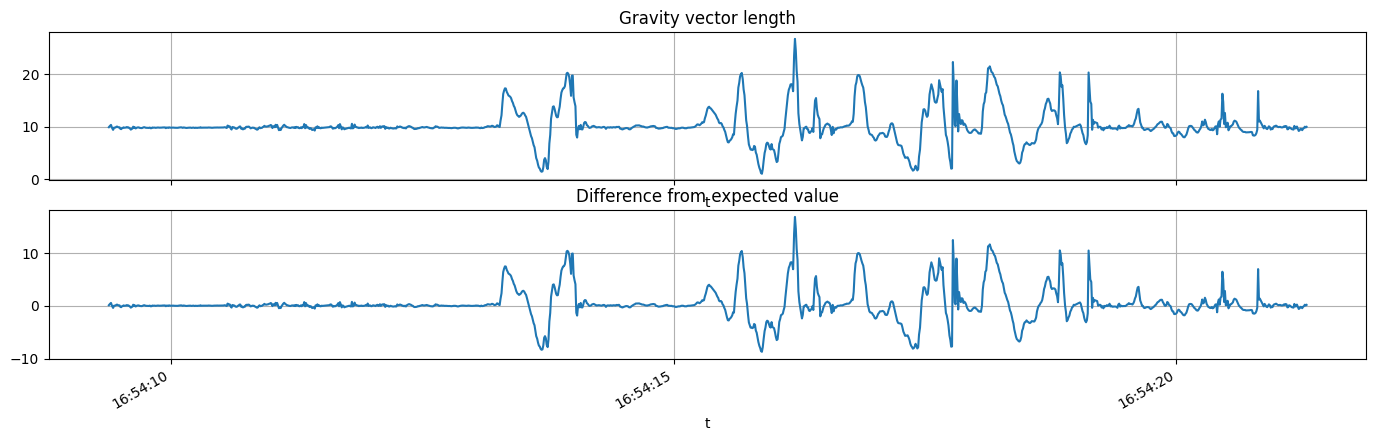

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1)

steps['accel._length'] = np.sqrt(steps['accel.x'] ** 2 + steps['accel.y'] ** 2 + steps['accel.z'] ** 2)
steps['accel._length'].plot(ax=ax1)
ax1.grid()
ax1.set_title('Gravity vector length')
ax1.xaxis.set_ticklabels([])

steps['gravity_delta'] = steps['accel._length'] - 9.80665
steps['gravity_delta'].plot(ax=ax2)
ax2.grid()
ax2.set_title('Difference from expected value')

fig.set_figwidth(17)

### Preview computed position, velocity, acceleration

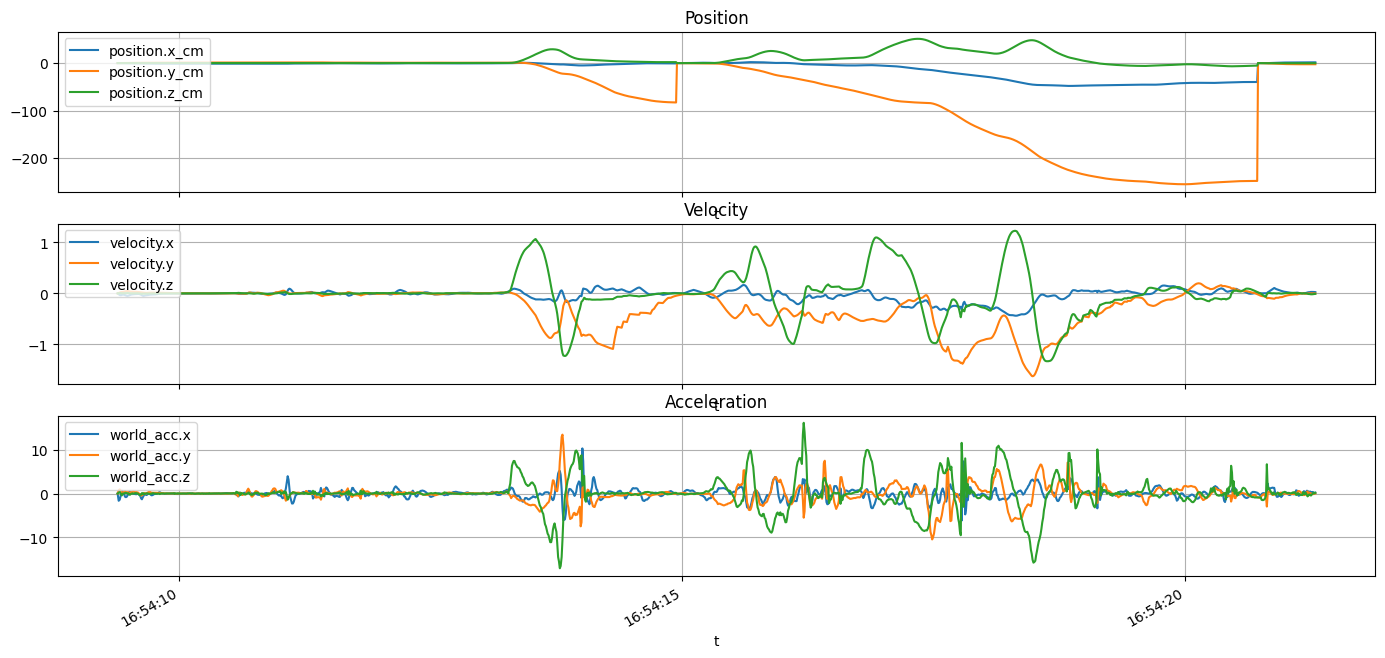

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

algo['position.x_cm'] = algo['position.x'] * 100
algo['position.y_cm'] = algo['position.y'] * 100
algo['position.z_cm'] = algo['position.z'] * 100

algo['position.x_cm'].plot(ax=ax1)
algo['position.y_cm'].plot(ax=ax1)
algo['position.z_cm'].plot(ax=ax1)
ax1.legend(loc='upper left')
ax1.grid()
ax1.set_title('Position')
ax1.xaxis.set_ticklabels([])

algo['velocity.x'].plot(ax=ax2)
algo['velocity.y'].plot(ax=ax2)
algo['velocity.z'].plot(ax=ax2)
ax2.legend(loc='upper left')
ax2.grid()
ax2.set_title('Velocity')
ax2.xaxis.set_ticklabels([])

algo['world_acc.x'].plot(ax=ax3)
algo['world_acc.y'].plot(ax=ax3)
algo['world_acc.z'].plot(ax=ax3)
ax3.legend(loc='upper left')

ax3.grid()
ax3.set_title('Acceleration')

fig.set_figwidth(17)
fig.set_figheight(8)

### Load Euler angles

In [25]:
angles = pd.read_csv(ANGLES_DATA)
# Convert ESP32 system time to local time so the graphs make more sense.
angles['t'] = pd.to_datetime((angles['time'] / 1_000_000_000.0) + now, unit='s')
angles.set_index(angles['t'], inplace=True)
angles.drop(columns=['t'], inplace=True)
angles.head()

,time,fusion.yaw,fusion.pitch,fusion.roll,gyro.yaw,gyro.pitch,gyro.roll,accel.yaw,accel.pitch,accel.roll,gyro.x,gyro.y,gyro.z,gyro.w
t,,,,,,,,,,,,,,
2024-11-29 16:54:09.385234118,457228484608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2024-11-29 16:54:09.395949125,457239199744,0.132371,0.553184,0.185243,0.157521,0.064493,-0.027885,5.416084e-08,9.859874,4.239430,-0.000244,0.000562,0.001375,0.999999
2024-11-29 16:54:09.406369448,457249619968,0.350418,0.893893,0.440633,0.389276,0.487918,0.151942,0.000000e+00,8.640716,5.920168,0.001311,0.004262,0.003391,0.999984
2024-11-29 16:54:09.416789770,457260040192,0.648686,0.832043,0.562534,0.686432,0.714638,0.386090,-6.679780e-09,3.083868,3.903674,0.003332,0.006256,0.005969,0.999957
2024-11-29 16:54:09.427275419,457270525952,0.974330,0.416044,0.550213,1.023601,0.617736,0.495237,3.340960e-09,-3.407504,1.629279,0.004273,0.005429,0.008909,0.999936


### Compare orientations

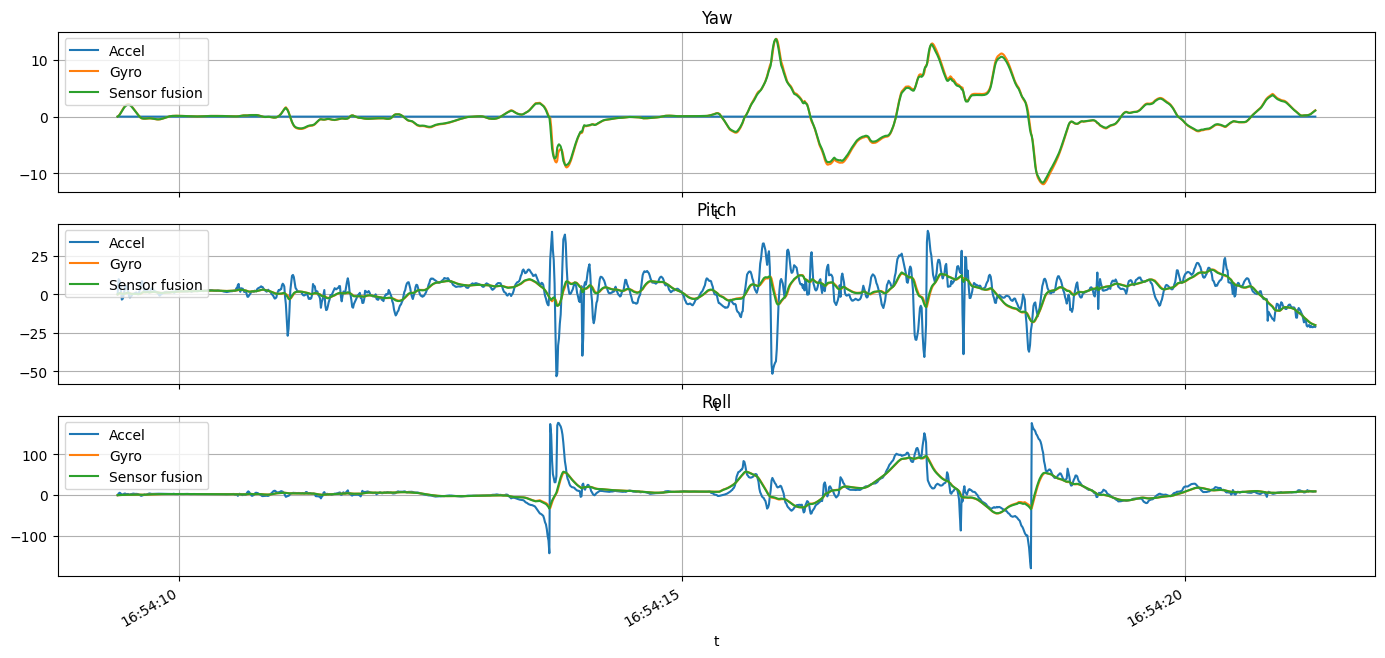

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

angles['accel.yaw'].plot(ax=ax1, label='Accel')
angles['gyro.yaw'].plot(ax=ax1, label='Gyro')
angles['fusion.yaw'].plot(ax=ax1, label='Sensor fusion')
ax1.legend(loc='upper left')
ax1.grid()
ax1.set_title('Yaw')
ax1.xaxis.set_ticklabels([])

angles['accel.pitch'].plot(ax=ax2, label='Accel')
angles['gyro.pitch'].plot(ax=ax2, label='Gyro')
angles['fusion.pitch'].plot(ax=ax2, label='Sensor fusion')
ax2.legend(loc='upper left')
ax2.grid()
ax2.set_title('Pitch')
ax2.xaxis.set_ticklabels([])

angles['accel.roll'].plot(ax=ax3, label='Accel')
angles['gyro.roll'].plot(ax=ax3, label='Gyro')
angles['fusion.roll'].plot(ax=ax3, label='Sensor fusion')
ax3.legend(loc='upper left')
ax3.grid()
ax3.set_title('Roll')

fig.set_figwidth(17)
fig.set_figheight(8)

### Review quaternion values from gyro

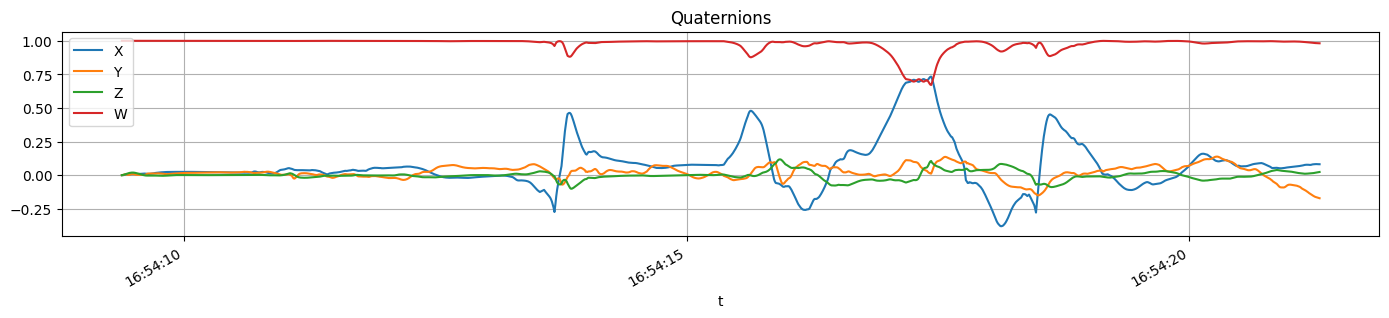

In [27]:
fig, ax1 = plt.subplots(1, 1)

angles['gyro.x'].plot(ax=ax1, label='X')
angles['gyro.y'].plot(ax=ax1, label='Y')
angles['gyro.z'].plot(ax=ax1, label='Z')
angles['gyro.w'].plot(ax=ax1, label='W')
ax1.grid()
ax1.set_title('Quaternions')
ax1.legend()

fig.set_figwidth(17)
fig.set_figheight(3)

### Packets per second

<Axes: xlabel='t'>

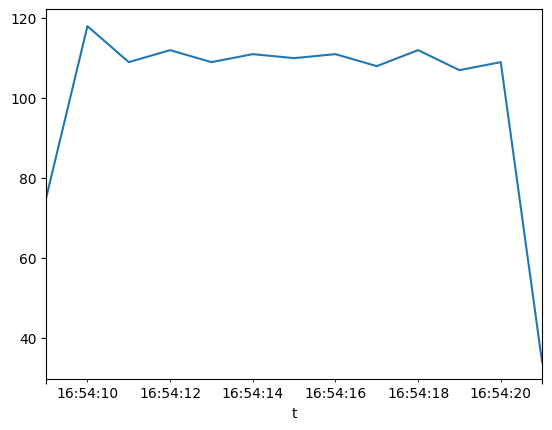

In [28]:
packets = steps.resample('1s').count()
packets.drop(columns=['gyro.x','gyro.y'], inplace=True)
packets.rename(columns={'time': 'packets/s'}, inplace=True)
packets['packets/s'].plot()

### Analyze the detected steps

In [29]:
steps = pd.read_csv(STEPS_DATA)
# Convert ESP32 system time to local time so the graphs make more sense.
steps['start'] = pd.to_datetime((steps['start'] / 1_000_000_000.0) + now, unit='s')
steps['peak'] = pd.to_datetime((steps['peak'] / 1_000_000_000.0) + now, unit='s')
steps['finished'] = pd.to_datetime((steps['finished'] / 1_000_000_000.0) + now, unit='s')
steps

,start,peak,finished,peak.x,peak.y,peak.z
0,2024-11-29 16:54:13.402558088,2024-11-29 16:54:13.884739161,2024-11-29 16:54:14.937870026,-0.021125,-0.150877,0.291246
1,2024-11-29 16:54:15.470055103,2024-11-29 16:54:16.102870703,2024-11-29 16:54:20.715425491,0.005495,-0.227933,0.255273


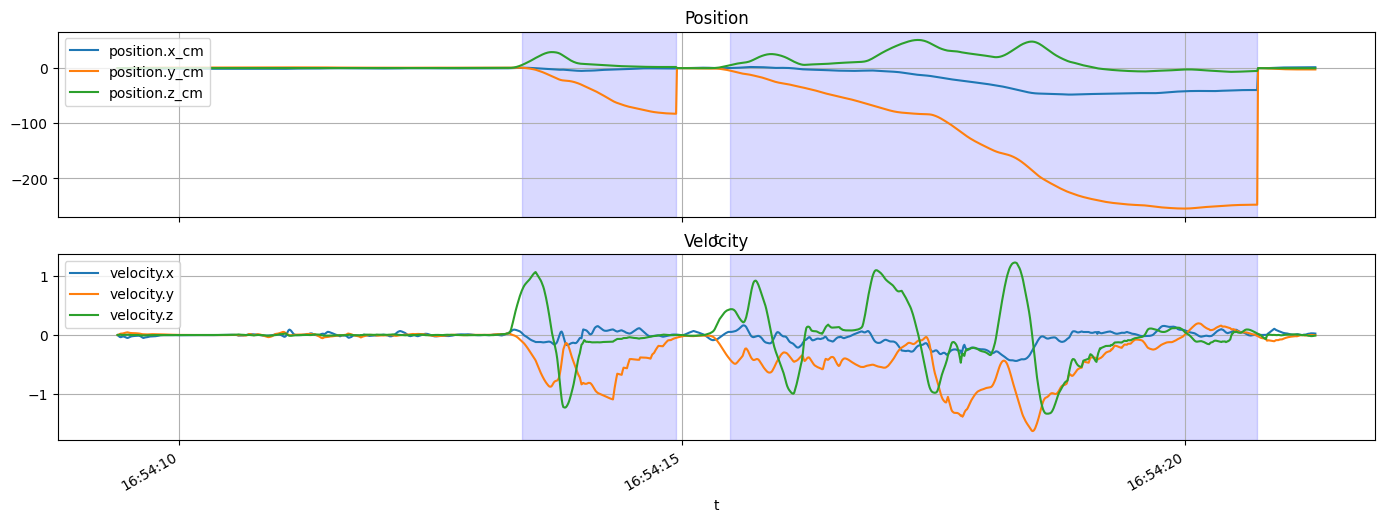

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1)

algo['position.x_cm'] = algo['position.x'] * 100
algo['position.y_cm'] = algo['position.y'] * 100
algo['position.z_cm'] = algo['position.z'] * 100

algo['position.x_cm'].plot(ax=ax1)
algo['position.y_cm'].plot(ax=ax1)
algo['position.z_cm'].plot(ax=ax1)
ax1.legend(loc='upper left')
ax1.grid()
ax1.set_title('Position')
ax1.xaxis.set_ticklabels([])

algo['velocity.x'].plot(ax=ax2)
algo['velocity.y'].plot(ax=ax2)
algo['velocity.z'].plot(ax=ax2)
ax2.legend(loc='upper left')
ax2.grid()
ax2.set_title('Velocity')

for ax in [ax1, ax2]:
    for (i, step) in steps.iterrows():
        ax.axvspan(
            step['start'],
            step['finished'],
            color='blue',
            alpha=0.15
        )

fig.set_figwidth(17)
fig.set_figheight(6)